# Review 2: More examples of for loops and indexing with pandas dataframes

In the previous tutorials we have learned how to use basic python libraries, seaborn, pandas, matplotlib etc. This review tutorial will go over some of those concepts, specifically for loops and indexing, by using pandas dataframes.

#### Learning goals

  - Briefly review dataframes
  - Go over multiple ways to index into dataframes
  - Find index values that meet specific criteria within a pandas dataframe
  - Use for loops on a pandas dataframe
  
#### Prerequisites
  - Python and NumPy
  - Pandas, DataFrames and TimeSeries
  - Seaborn
  - Matplotlib
  
 ---

The goal of this tutorial is to put together many of the previous teahcings to analyze real world data.

For this, we will use the same open [data about hourly bicycle counts made available by the city of Seattle, WA](http://data.seattle.gov/) as from tutorial022. You should still have access to this from previous class. We will start with a brief reminder of Pandas dataframes, using the same commands from the previous tutorial. We will then follow up with examples for indexing and for loops with pandas dataframes.

As a reminder of the contents of the dataset, Seattle has a bridge called Fremont Bridge. The bridge has installed devices that count bycles passing over the bridge (an automated bicycle counter). The sensors are located in the east and west sidewalks of the bridge.

### Pandas Review: Data loading and preparation

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set() # this will set seaborn as the default formatting for all plots
import matplotlib.pyplot as plt

The first we will do is to load the data into a Pandas DataFrame. 

Make sure the data is saved inside a folder called 'datasets' saved in the current directory.

In [15]:
data = pd.read_csv('./datasets/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)

After loading the data, let's take a quick look at the DataFrame. Just the first few rows. In this way, we will also test if everything is loaded and ready.

In [16]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


The labels in the columns of are a bit too long for our purposes. So we will simolify them into 'Total', 'West' and 'East'. These are the counts (how many bicycles) in the West or East sidewalks and the Total counts across the two sidewlaks, 'Total'.

In [17]:
data.columns = ['Total','East', 'West']

We will now recompute the total counts and save them back into the column called Total. 

Note. We use the method `eval`, that (ahem) evaluates a Python expression as a string. Meaning you can write a string, for a command and `eval` will run the command for you, like adding two columns of a DataFrame.

In [18]:
data1 = data
data1['Total'] = data1.eval('West + East')
data1.head()
data1.dropna().describe()

,Total,East,West
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


In [6]:
data['Total'] = data['West'] + data['East']
data.head()
data_tem = data.dropna()
data_tem.describe()

,Total,East,West
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


We can now take a look at the reorganized columns. This time using `describe`. But we want to drop the missing entries, so we use first `dropna`.

### Data visualization

The next thing we can do with the data is to visualize the time series. We can plot for example the counts (`Y` axis) by date (`X` axis).

Text(0, 0.5, 'Bicycle per hour')

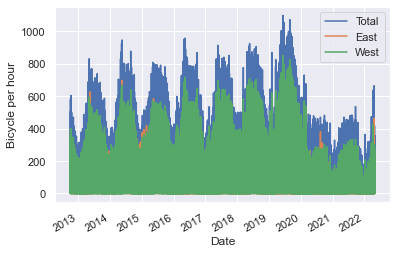

In [19]:
data.plot()
plt.ylabel("Bicycle per hour")

Excellent! We've gone over an example of a dataframe, first by loading the dataframe and describing some of the underlying descriptives of the dataframe. We followed that up by creating a visualizaiton of the data.

Next, we will work through some examples of indexing and for loops using pandas dataframes.

### Indexing, for loops, and dataframes

There are many ways to index within dataframes. Remember, an indices allow us to extract specific entries in the dataframe. For a simple example, let's find the index of the values greater than 50 in the following list: [10,75,850,1,23,51,49,3,73,11,33,29].

In [20]:
lst = [10,75,850,1,23,51,49,3,73,11,33,29]

There are many ways we can actually do this. First, we could use a little logic and a for loop to build a new list of locations within the original list where the value is greater than 50.

In [21]:
# build a for loop to keep track of indices
indices = list()

for i in range(len(lst)):
    if lst[i] > 50:
        indices.append(i) # this will append the index i to the list if the lst value at the index is greater than 50

# print the indices
print('these are the indices where lst is greater than 50: %s' %str(indices))

these are the indices where lst is greater than 50: [1, 2, 5, 8]


Great! Now let's compute the average of the values greater than 50!

In [22]:
vls = lst[indices]

TypeError: list indices must be integers or slices, not list

Oh weird! I got an error! That's strange! Looks like I can't grab the values from lst with a list of multiple indices. Bummer!

Looking at the error message, can you make a guess as to why this doesn't work? Enter your response below:

So, what can we do? Well, we have two options: one using numpy and the other using pandas. Let's go over the pandas way first.

Specifically, we can use pd.Series to turn lst into a pandas series (think of a column in a dataframe), and then we can use multiple indices to extract the values from.

In [23]:
# Turn lst into a series and grab values from series
lst_series = pd.Series(lst)
vls = lst_series[indices]

# Compute the mean
mean_vls = np.mean(vls)
print('The average value of instances above 50 is %s' %str(mean_vls))

The average value of instances above 50 is 262.25


Exercise: Can you do this using numpy? HINT: instead of a series, you need to turn lst into an array

In [55]:
lst_array = np.array(lst)
vls = lst_array[indices]

mean_vls = np.mean(vls)
print('The average value of instances above 50 is %s' %str(mean_vls))

The average value of instances above 50 is 262.25


Excellent! We now know how to identify the index of values that meet a certain criteria in a list, and then how to compute the mean of those values by indexing into the list.

You may be asking yourself though: what exactly was our for loop doing to identify these indices? Well, let's take a little deeper dive into what our for loop from above was doing.

We set our for loop up in a very specific way. Specifically, we used a 'range(len())' wrapping of functions. What exactly did this do?

Well, let's just simply print the values of i from our for loop.

In [28]:
for i in range(len(lst)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


Ahh, so it looks like it's just counting by 1 all the way until the length of our list array. Remember, python starts with 0 as the first value.

So cool, what is the rest of the loop doing? Well, let's add a few more print statements to see.

In [29]:
for i in range(len(lst)):
    print('this is the index of the loop %s and the value within lst at that index %s' %(str(i),str(lst[i])))

this is the index of the loop 0 and the value within lst at that index 10
this is the index of the loop 1 and the value within lst at that index 75
this is the index of the loop 2 and the value within lst at that index 850
this is the index of the loop 3 and the value within lst at that index 1
this is the index of the loop 4 and the value within lst at that index 23
this is the index of the loop 5 and the value within lst at that index 51
this is the index of the loop 6 and the value within lst at that index 49
this is the index of the loop 7 and the value within lst at that index 3
this is the index of the loop 8 and the value within lst at that index 73
this is the index of the loop 9 and the value within lst at that index 11
this is the index of the loop 10 and the value within lst at that index 33
this is the index of the loop 11 and the value within lst at that index 29


Oh okay. Sor our for loop is starting at index 0 and looping through index 11 (i.e. position 12 of lst, also the length of lst). We can then use this i index into list and extract that specific value.

So in our for loop from above, we were looping through every position of lst starting at the 0th position, identifying those locations in lst where lst[i] > 50, and then appending those values of i to a new list (indices).

We are then able to use this to extract all the values of lst greater than 50!

So, putting it all together:

In [30]:
for i in range(len(lst)):
    if lst[i] > 50:
        print('the value at this position %s in lst is greater than 50' %(str(i)))

the value at this position 1 in lst is greater than 50
the value at this position 2 in lst is greater than 50
the value at this position 5 in lst is greater than 50
the value at this position 8 in lst is greater than 50


Great! So that's a brief description of indexing. Let's see how we can use this concept within a pandas dataframe.

First, let's briefly review some ways we can index columns for a dataframe.

Say we want to look at the 'Total' column in data.

In [31]:
# using brackets
data['Total']

Date
2019-11-01 00:00:00     12.0
2019-11-01 01:00:00      7.0
2019-11-01 02:00:00      1.0
2019-11-01 03:00:00      6.0
2019-11-01 04:00:00      6.0
                       ...  
2022-04-30 19:00:00    164.0
2022-04-30 20:00:00     70.0
2022-04-30 21:00:00     79.0
2022-04-30 22:00:00     40.0
2022-04-30 23:00:00     24.0
Name: Total, Length: 150158, dtype: float64

In [32]:
# using .column_name
data.Total

Date
2019-11-01 00:00:00     12.0
2019-11-01 01:00:00      7.0
2019-11-01 02:00:00      1.0
2019-11-01 03:00:00      6.0
2019-11-01 04:00:00      6.0
                       ...  
2022-04-30 19:00:00    164.0
2022-04-30 20:00:00     70.0
2022-04-30 21:00:00     79.0
2022-04-30 22:00:00     40.0
2022-04-30 23:00:00     24.0
Name: Total, Length: 150158, dtype: float64

In [63]:
# using .loc
data.loc[:,data.columns == 'Total']

,Total
Date,
2019-11-01 00:00:00,12.0
2019-11-01 01:00:00,7.0
2019-11-01 02:00:00,1.0
2019-11-01 03:00:00,6.0
2019-11-01 04:00:00,6.0
...,...
2022-04-30 19:00:00,164.0
2022-04-30 20:00:00,70.0
2022-04-30 21:00:00,79.0


Cool, so we have multiple ways to extract information from a column!

Now, let's count all the instances in our Biking dataframe where the total number of bikers is greater than the all-time average number of bikers.

Let's first do this by building a simple for loop like we did above.

In [65]:
# first, let's compute the mean of bikers across time
mean_bikers = data['Total'].mean()

# next, let's loop through all the entries in the dataframe and identify the rows where the Total number of bikers is greater than the total mean
bikers_indices = list()
for i in range(len(data['Total'])):
    if data['Total'][i] > mean_bikers:
        bikers_indices.append(i)
        
print('There are %s timestamps where there were more than %s bikers on the bridge' %(str(len(bikers_indices)),str(mean_bikers)))

There are 50180 timestamps where there were more than 109.5074200380993 bikers on the bridge


Awesome, that's a lot of timepoints to sample from!

Can you build a list of indices where there were fewer than mean_bikers on the bridge by modifying the for loop from above?

In [66]:
mean_bikers = data['Total'].mean()

new_bikers_indices = list()
for i in range(len(data['Total'])):
    if data['Total'][i] < mean_bikers:
       new_bikers_indices.append(i)
        
print('There are %s timestamps where there were less than %s bikers on the bridge' %(str(len(bikers_indices)),str(mean_bikers)))

There are 50180 timestamps where there were less than 109.5074200380993 bikers on the bridge


Great, so we have a list of indices. Now how can we use them to extract data!

We can use a pandas module called 'iloc' and pass in our indices list. Let's do that, and save a new dataframe

In [67]:
bikers_greater_than_average = data.iloc[bikers_indices] # loc is for columns, iloc is for rows
bikers_greater_than_average

,Total,East,West
Date,,,
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0
2019-11-01 09:00:00,332.0,130.0,202.0
2019-11-01 10:00:00,124.0,56.0,68.0
2019-11-01 13:00:00,110.0,46.0,64.0
...,...,...,...
2022-04-30 15:00:00,238.0,105.0,133.0
2022-04-30 16:00:00,255.0,100.0,155.0
2022-04-30 17:00:00,187.0,85.0,102.0


Excellent! Now, what if i told you there was a simpler way to create this dataframe? We can leverage pandas .loc function to find only the instances that meet our criteria. Essentially, with this, we can skip building a list of indices as pandas will do this for us!

Let me show you!

In [70]:
bikers_greater_than_average_2 = data.loc[data['Total'] > mean_bikers]
bikers_greater_than_average_2

,Total,East,West
Date,,,
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0
2019-11-01 09:00:00,332.0,130.0,202.0
2019-11-01 10:00:00,124.0,56.0,68.0
2019-11-01 13:00:00,110.0,46.0,64.0
...,...,...,...
2022-04-30 15:00:00,238.0,105.0,133.0
2022-04-30 16:00:00,255.0,100.0,155.0
2022-04-30 17:00:00,187.0,85.0,102.0


In [71]:
(bikers_greater_than_average == bikers_greater_than_average_2).Total.unique()

array([ True])

<AxesSubplot:xlabel='Total', ylabel='Total'>

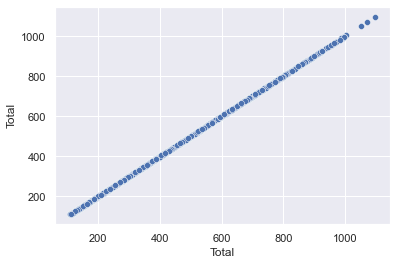

In [72]:
sns.scatterplot(x=bikers_greater_than_average['Total'],y=bikers_greater_than_average_2['Total'])

And as you can see, the dataframes are exactly the same, and I didn't have to build a for loop to do this! Awesome! Love being lazy!

### Exercise.

Using the bikers dataframe, what we've discussed above, and some of the plot making functions from previous tutorials, answer the following questions by writing code in the proceeding cells:

    1. How many timepoints exist in the Bikers dataframe where the Total number of bikers on the bridge is between min and 50 (a), 50 and 75 (b), and 75 and max (c)? For a) and b), use for loops and numpy. For c), use pandas functions.
    
    2. What do the distributions for each of these bins look like? To do this, create a subsampling of the 'data' dataframe with the indices from each bin in question 1 and create three histograms (one for each binning a, b, c) of the Total number of bikers.
    
    3. Do Eastbound travelers outbound Westbound travelers during these bins? To answer this, use the indices from 1a, b, and c and create three bar plots (one for each binninng a b c) of the the number of bikers heading East and the number of bikers heading West.

1. (a)

In [90]:
min_data  = data['Total'].min()
# min = 0

indices_min_50 = list()
for i in range(len(data['Total'])):
    if data['Total'][i] > data['Total'].min():
        if data['Total'][i] < 50:
            indices_min_50.append(i)
            
data_min_50 = data.iloc[indices_min_50]
data_min_50

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2022-04-30 08:00:00,33.0,15.0,18.0
2022-04-30 09:00:00,34.0,11.0,23.0
2022-04-30 10:00:00,49.0,21.0,28.0


1. (b)

In [92]:
indices_50_75 = list()
for i in range(len(data['Total'])):
    if data['Total'][i] > 50:
        if data['Total'][i] < 75:
            indices_50_75.append(i)
            
indices_50_75 = data.iloc[indices_50_75]
indices_50_75

,Total,East,West
Date,,,
2019-11-02 08:00:00,56.0,27.0,29.0
2019-11-02 09:00:00,74.0,39.0,35.0
2019-11-02 19:00:00,62.0,21.0,41.0
2019-11-03 08:00:00,64.0,26.0,38.0
2019-11-03 18:00:00,66.0,30.0,36.0
...,...,...,...
2022-04-28 11:00:00,69.0,34.0,35.0
2022-04-28 13:00:00,73.0,31.0,42.0
2022-04-29 06:00:00,69.0,40.0,29.0


1. (c)

In [95]:
max_data = data['Total'].max()

indices_max_75 = list()
for i in range(len(data['Total'])):
    if data['Total'][i] > 75:
        if data['Total'][i] < data['Total'].max():
            indices_max_75.append(i)
            
indices_max_75 = data.iloc[indices_max_75]
indices_max_75

,Total,East,West
Date,,,
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0
2019-11-01 09:00:00,332.0,130.0,202.0
2019-11-01 10:00:00,124.0,56.0,68.0
...,...,...,...
2022-04-30 16:00:00,255.0,100.0,155.0
2022-04-30 17:00:00,187.0,85.0,102.0
2022-04-30 18:00:00,152.0,79.0,73.0


2.

(array([11741.,  7304.,  7514.,  3887.,  3195.,  4024.,  2325.,  3234.,
         2081.,  1985.,  2688.,  1838.,  2546.,  1628.,  1522.,  2240.,
         1421.,  2195.,  1295.,  1958.]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ,
        27.4, 29.8, 32.2, 34.6, 37. , 39.4, 41.8, 44.2, 46.6, 49. ]),
 <BarContainer object of 20 artists>)

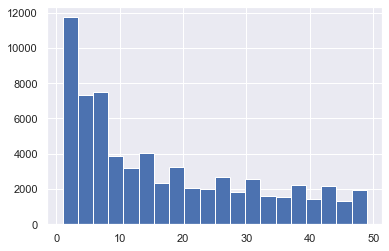

In [96]:
# A
fig = plt.figure()
plt.hist(data_min_50['Total'], bins=20)

(array([1257.,  639.,  571.,  676.,  657.,  630., 1161.,  588.,  531.,
         567.,  577.,  600.,  603., 1144.,  505.,  535.,  558.,  542.,
         525., 1023.]),
 array([51.  , 52.15, 53.3 , 54.45, 55.6 , 56.75, 57.9 , 59.05, 60.2 ,
        61.35, 62.5 , 63.65, 64.8 , 65.95, 67.1 , 68.25, 69.4 , 70.55,
        71.7 , 72.85, 74.  ]),
 <BarContainer object of 20 artists>)

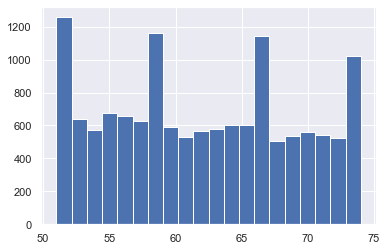

In [97]:
# B
fig = plt.figure()
plt.hist(indices_50_75['Total'], bins=20)

(array([2.2576e+04, 1.3734e+04, 8.1760e+03, 5.2620e+03, 4.1310e+03,
        3.0780e+03, 2.2320e+03, 1.5210e+03, 1.5780e+03, 1.1970e+03,
        8.9000e+02, 5.6000e+02, 4.3400e+02, 3.2800e+02, 2.4200e+02,
        1.2800e+02, 7.2000e+01, 3.8000e+01, 1.8000e+01, 4.0000e+00]),
 array([  76.  ,  125.75,  175.5 ,  225.25,  275.  ,  324.75,  374.5 ,
         424.25,  474.  ,  523.75,  573.5 ,  623.25,  673.  ,  722.75,
         772.5 ,  822.25,  872.  ,  921.75,  971.5 , 1021.25, 1071.  ]),
 <BarContainer object of 20 artists>)

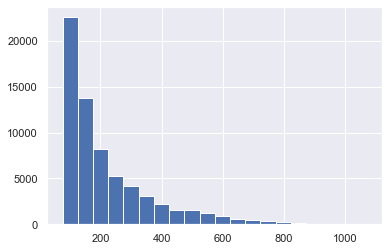

In [98]:
# C
fig = plt.figure()
plt.hist(indices_max_75['Total'], bins=20)

3.

In [ ]:
# A data_min_50
fig = plt.figure()
sns.barplot([data_min_50['East'],data_min_50['West']])

In [ ]:
# B indices_50_75

fig = plt.figure()
sns.barplot([indices_50_75['East'],indices_50_75['West']])

In [ ]:
# C indices_max_75

fig = plt.figure()
sns.barplot([indices_max_75['East'],indices_max_75['West']])